In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../src/")

In [3]:
from plot_utils import plot_zscale_image, show_imstat
import astropy
import fitsio

In [4]:
from photutils.background import MADStdBackgroundRMS, SExtractorBackground, Background2D

In [5]:
# first remove the background
# Source extractor might have already removed the background
from astropy.stats import SigmaClip
sigma_clip = SigmaClip(sigma=5.0)
madbkgrms = MADStdBackgroundRMS(sigma_clip)
sexbkg = SExtractorBackground(sigma_clip)

In [6]:
from pathlib import Path

wiro_dir = Path("/global/cfs/cdirs/desi/users/adamyers/wiro")
reduced_dir = wiro_dir / "reduced"
astrometric_dir = Path("/global/cscratch1/sd/brookluo/astrometry")

red_1031_dir = reduced_dir / "20221031"

In [6]:
imdata = fitsio.read(red_1031_dir / "a269_zbf.fit")

In [7]:
bkg = Background2D(imdata, (60, 60), filter_size=(3, 3),
                   bkg_estimator=sexbkg)

Mean: 935.8339807391167 Std: 1668.7809403417698 Median: 880.0 RMS: 30.591403706582618 Min: 0 Max: 156412
Mean: 54.81292736530304 Std: 1664.738848957137 Median: 1.0 RMS: 7.403575309625954 Min: -1243 Max: 155175
Mean: 880.998739361763 Std: 33.62325459893909 Median: 880.0 RMS: 29.68162292331339 Min: 838 Max: 1243


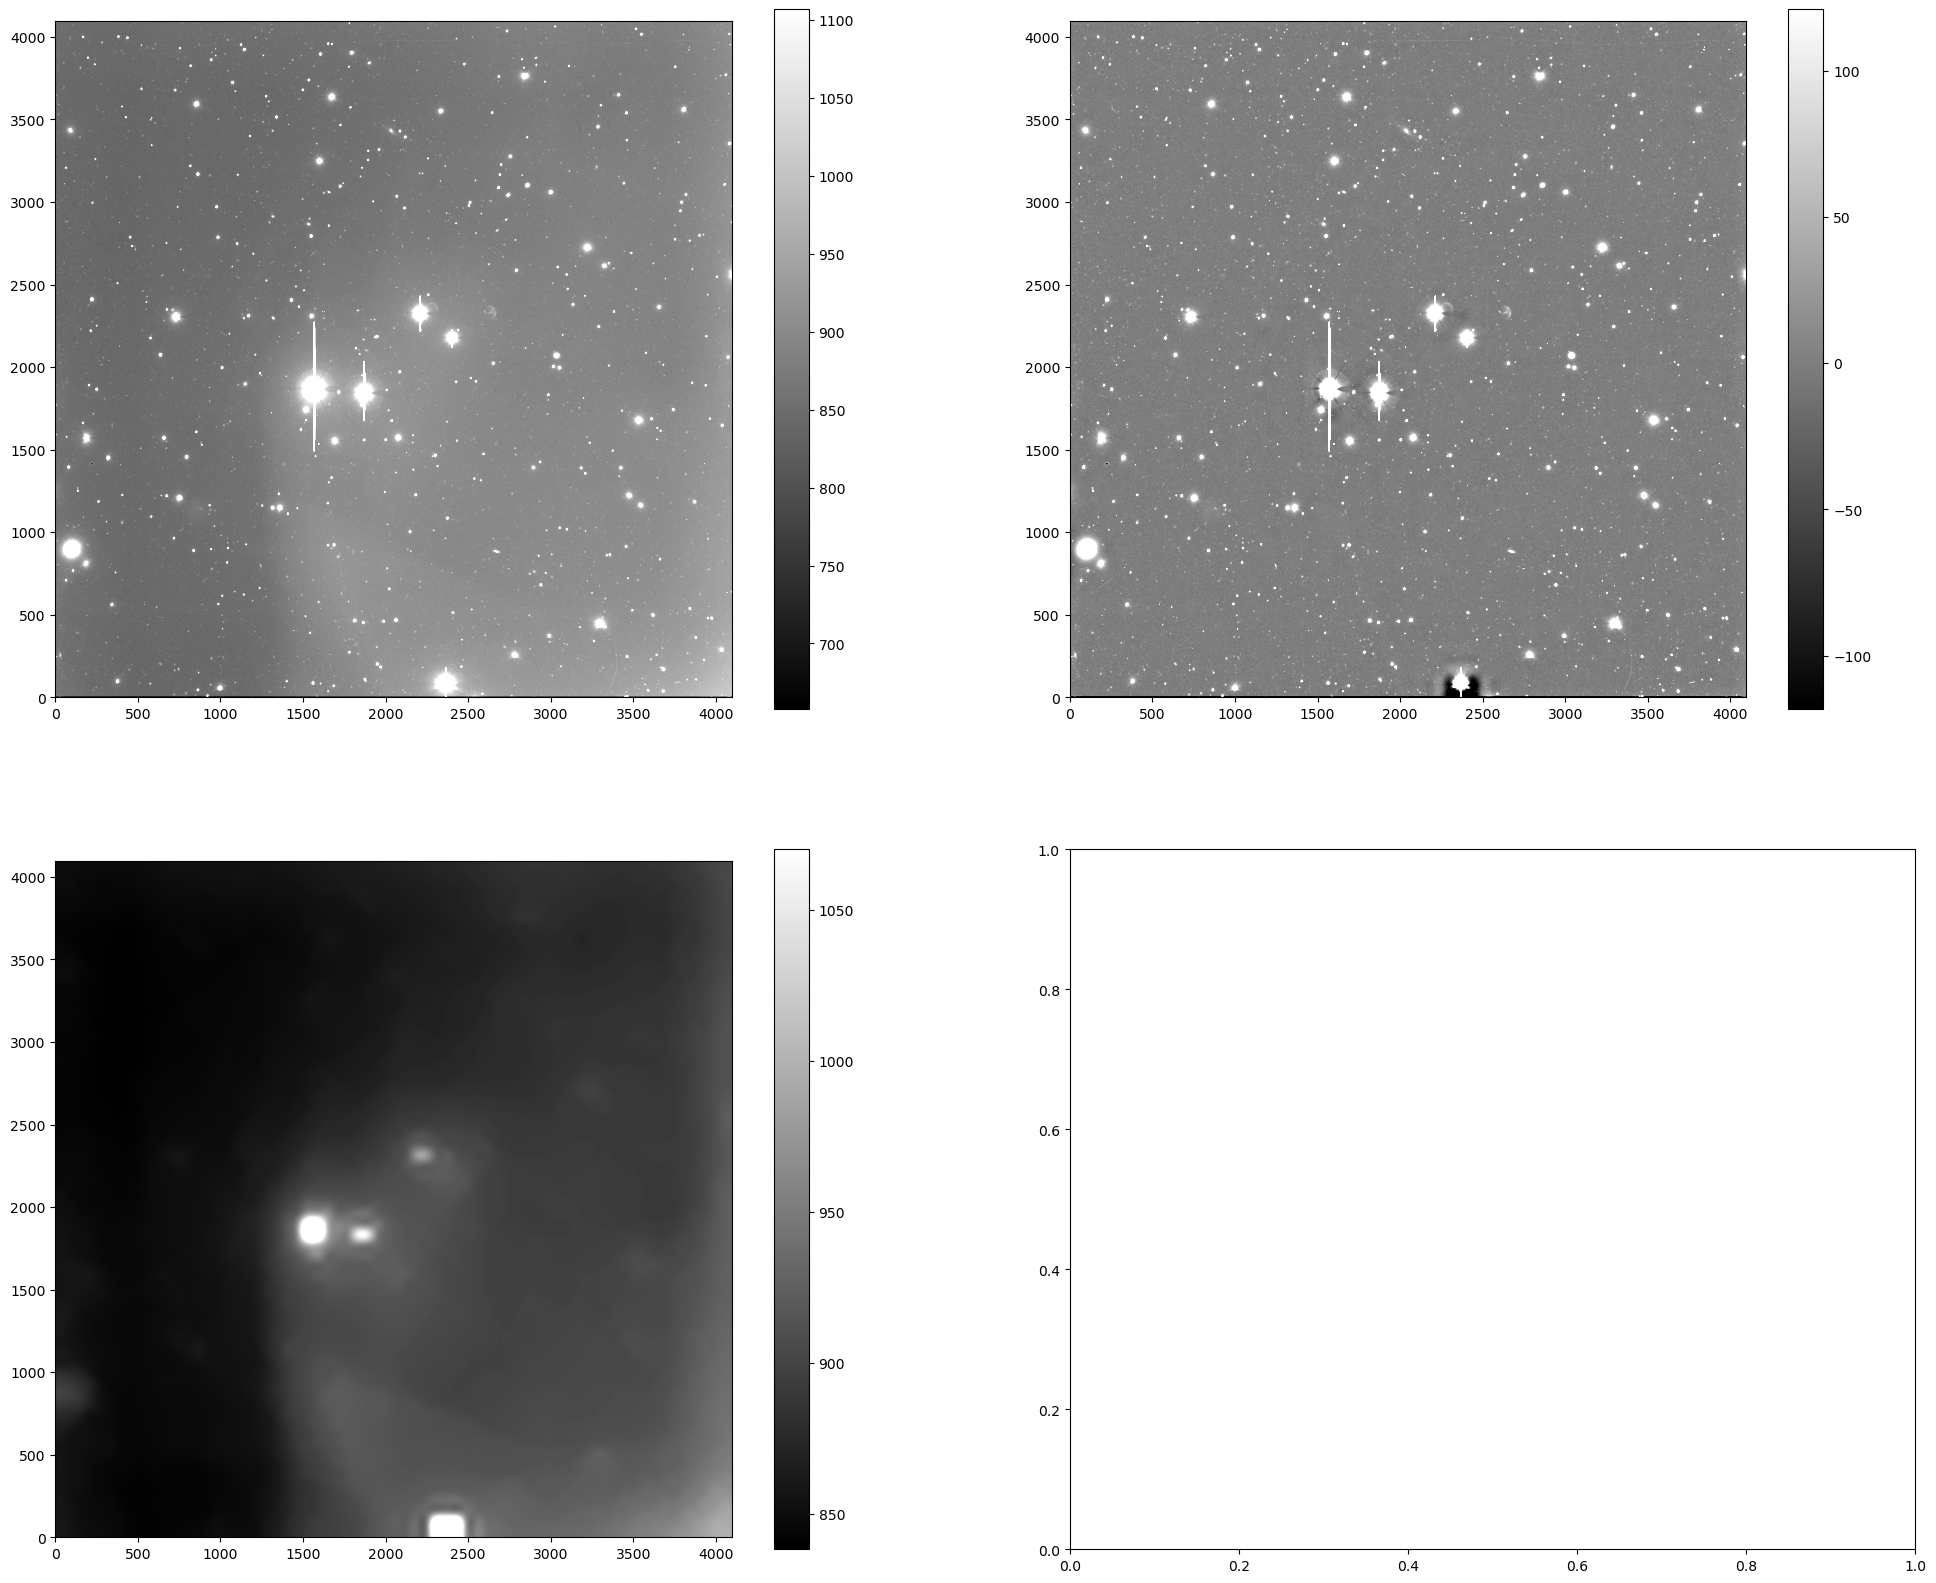

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(24, 20))
ax = ax.ravel()
vmin, vmax = plot_zscale_image(imdata, ax[0], cmap="gray")
show_imstat(imdata)
vmin, vmax = plot_zscale_image(imdata - bkg.background, ax[1], cmap="gray")
show_imstat(imdata - bkg.background)
vmin, vmax = plot_zscale_image(bkg.background, ax[2], cmap="gray")
show_imstat(bkg.background)
plt.savefig("comp-background-remove.png")

In [9]:
astrome_1031 = astrometric_dir / "20221031"

In [10]:
from astropy.wcs import WCS

In [11]:
imwcs = WCS(str(astrome_1031 / 'a090_zbf.new'))

In [12]:
imwcs.pixel_to_world(20, 30)

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (36.00289658, 39.9223865)>

In [13]:
fitsio.read_header(astrome_1031 / "a090_zbf.axy")


SIMPLE  =                    T / file does conform to FITS standard
BITPIX  =                   16 / number of bits per data pixel
NAXIS   =                    0 / number of data axes
EXTEND  =                    T / FITS dataset may contain extensions
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used
COMMENT This FITS file may contain long string keyword values that are
COMMENT continued over multiple keywords.  This convention uses the  '&'
COMMENT character at the end of the string which is then continued
COMMENT on subsequent keywords whose name = 'CONTINUE'.
IMAGEW  =                 4096 / image width
IMAGEH  =                 4096 / image height
ANRUN   =                    T / Solve this field!
ANXCOL  = 'X_IMAGE'            / Name of column containing X coords
ANYCOL  = 'Y_IMAGE'            

In [68]:
source = fitsio.read(date_1031 / 'a090_zbf.axy')

In [ ]:
imdata = fitsio.read(red_1031_dir / "a090_zbf.fit")

In [98]:
# now visually check wcs for each images and then try to check the offset from each images
# using 34, 40 distortion field images
bright_idx = np.argpartition(source["MAG_AUTO"], 5)[:5]
faint_idx = np.argpartition(source["MAG_AUTO"], 1000)[1000-5:1000]

In [99]:
print(source["MAG_AUTO"][bright_idx])
print(source["MAG_AUTO"][faint_idx])

[-16.83567  -16.608389 -16.099823 -15.826396 -15.410003]
[-8.015528 -8.033959 -8.014203 -8.013392 -8.009011]


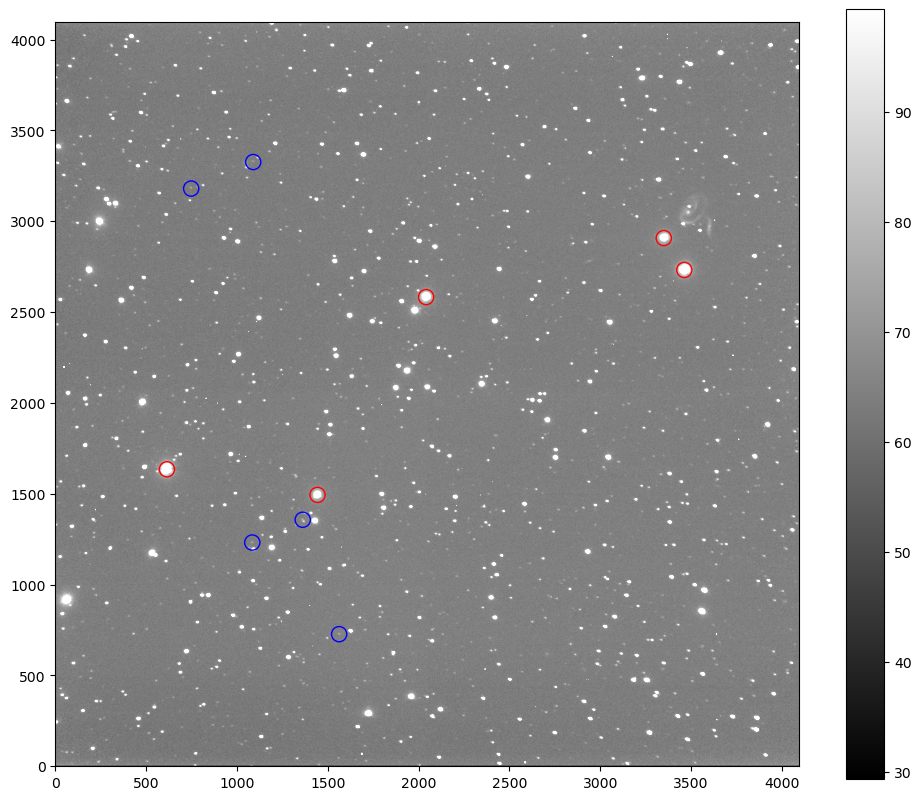

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
vmin, vmax = plot_zscale_image(imdata, ax, cmap="gray")
ax.scatter(source["X_IMAGE"][bright_idx], source["Y_IMAGE"][bright_idx], s=120,
            facecolors='none', edgecolors='r')
ax.scatter(source["X_IMAGE"][faint_idx], source["Y_IMAGE"][faint_idx], s=120,
            facecolors='none', edgecolors='b')

In [94]:
brights = source[bright_idx]
brights.sort(order=('X_IMAGE', "Y_IMAGE"))

for bright in brights:
    print("Image X, Y: ", bright["X_IMAGE"], bright["Y_IMAGE"])
    print("RA, DEC: ", imwcs.pixel_to_world(bright["X_IMAGE"], bright["Y_IMAGE"]))

Image X, Y:  614.3946 1634.4045
RA, DEC:  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (35.66658182, 39.83160583)>
Image X, Y:  1443.4673 1493.5587
RA, DEC:  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (35.69395393, 39.69900189)>
Image X, Y:  2041.3154 2582.466
RA, DEC:  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (35.46661963, 39.60492089)>
Image X, Y:  3349.8345 2907.4636
RA, DEC:  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (35.39729419, 39.3956686)>
Image X, Y:  3462.7769 2731.9478
RA, DEC:  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (35.43340423, 39.37750259)>


checked with aldin lite, it's quite close

cal wcs = 35.43340423, 39.37750259

real wcs = 35.43365486128, 39.37764927458

https://aladin.unistra.fr/AladinLite/?target=02%2021%2044.017%2B39%2022%2039.01&fov=0.11&survey=P%2FDSS2%2Fcolor

In [95]:
faints = source[faint_idx]
faints.sort(order=('X_IMAGE', "Y_IMAGE"))

for faint in faints:
    print("Image X, Y: ", faint["X_IMAGE"], faint["Y_IMAGE"])
    print("RA, DEC: ", imwcs.pixel_to_world(faint["X_IMAGE"], faint["Y_IMAGE"]))

Image X, Y:  747.9473 3179.9646
RA, DEC:  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (35.34456326, 39.81240294)>
Image X, Y:  1084.2412 1231.3792
RA, DEC:  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (35.74936087, 39.75583995)>
Image X, Y:  1089.4761 3326.141
RA, DEC:  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (35.3136751, 39.75785737)>
Image X, Y:  1362.1 1356.6686
RA, DEC:  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (35.7226106, 39.71174225)>
Image X, Y:  1562.5134 726.8842
RA, DEC:  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (35.85305347, 39.67848479)>


The image pointing is good to 3rd digit, ie delta <= 0.001 deg = 3.6 arcsec

calculated wcs = 35.85305347, 39.67848479

real wcs = 35.85385628061, 39.67868082202

https://aladin.unistra.fr/AladinLite/?target=02%2023%2024.733%2B39%2040%2042.55&fov=0.01&survey=P%2FDSS2%2Fcolor

In [1]:
# now stitch images together using reproject given WCS for each images
import reproject
from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd

In [155]:
# now with 1030, A, E image
data_1030_dir = wiro
xmm = []
for i in range(271, 276):
    imdata = fitsio.read(red_1031_dir / f"a{i:0>3}_zbf.fit")
    imwcs = WCS(str(date_1031 / f'a{i:0>3}_zbf.new'))
    xmm.append((imdata, imwcs))

In [156]:
opt_wcs, opt_shape = find_optimal_celestial_wcs(xmm)

In [164]:
xmm[0][1]

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 34.5964332444  -4.95735560163  
CRPIX : 2048.5  2048.5  
CD1_1 CD1_2  : -1.62517369577e-06  -0.000159686655378  
CD2_1 CD2_2  : -0.000159728030678  1.49480626603e-06  
NAXIS : 4096  4096

In [157]:
imfinal = reproject_and_coadd(xmm, opt_wcs, opt_shape,
                              reproject_function=reproject.reproject_adaptive,
                              combine_function="sum")

/global/homes/b/brookluo/.conda/envs/py39/lib/python3.9/site-packages/reproject/mosaicking/coadd.py:156: FutureWarning: The default kernel will change from 'Hann' to  'Gaussian' in a future release. To suppress this warning, explicitly select a kernel with the 'kernel' argument.
  array, footprint = reproject_function((array_in, wcs_in),
/global/homes/b/brookluo/.conda/envs/py39/lib/python3.9/site-packages/reproject/mosaicking/coadd.py:156: FutureWarning: The default boundary mode will change from 'ignore' to  'strict' in a future release. To suppress this warning, explicitly select a mode with the 'boundary_mode' argument.
  array, footprint = reproject_function((array_in, wcs_in),
/global/homes/b/brookluo/.conda/envs/py39/lib/python3.9/site-packages/reproject/mosaicking/coadd.py:156: FutureWarning: The default kernel will change from 'Hann' to  'Gaussian' in a future release. To suppress this warning, explicitly select a kernel with the 'kernel' argument.
  array, footprint = reproje

In [158]:
imfinal[1].shape

(4211, 4209)

In [159]:
from astropy.nddata import CCDData

In [160]:
final_image = CCDData(data=imfinal[0], mask=imfinal[1], unit='adu')

In [162]:
final_image.write(red_1031_dir / "E-5-XMM-combined.fits")

Mean: 4939.243204746261 Std: 7890.577251171075 Median: 4900.0 RMS: 70.27974960645678 Min: 0 Max: 515269


(4939.243204746261, 7890.577251171075, 4900.0)

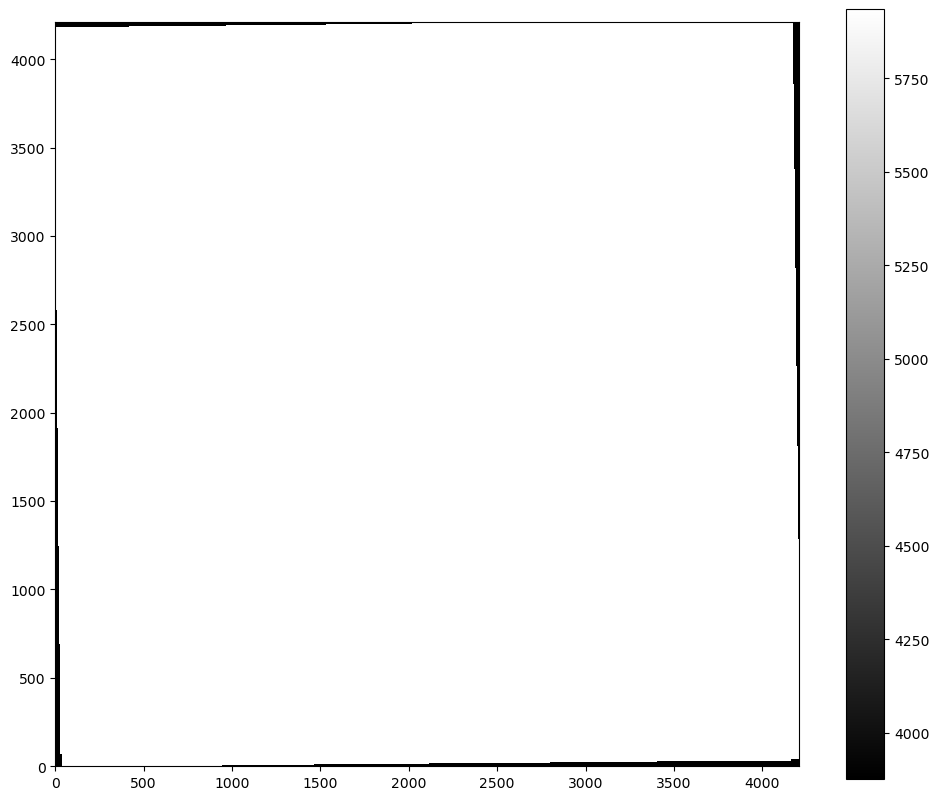

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
vmin, vmax = plot_zscale_image(final_image, ax, cmap="gray")
show_imstat(final_image.data)